# 🧠 분류 신경망 - Week 1 Day 2

## 📋 학습 목표
1. **Multi-layer Neural Network** 구현 🎯
2. **아이리스 분류** PyTorch 버전 🌸
3. **Phase 1과 성능 비교** 📊
4. **분류 결과 시각화** 🎨

### 🔥 **Linear Regression → Classification 업그레이드!**

| Linear Regression | Classification |
|------------------|----------------|
| 🔸 연속값 예측 | 🔥 범주 예측 |
| 🔸 1개 출력 | 🔥 여러 클래스 |
| 🔸 MSE Loss | 🔥 CrossEntropy Loss |
| 🔸 회귀 문제 | 🔥 분류 문제 |

---

## 🤖 **scikit-learn vs PyTorch: 수동 vs 자동**

### 📚 **Phase 1에서 했던 방식 (scikit-learn)**
```python
# 🚀 3줄로 끝! (자동)
model = RandomForestClassifier()
model.fit(X_train, y_train)        # ✨ 마법의 fit()!
predictions = model.predict(X_test) # 🎯 바로 예측!
```

**특징:**
- ✅ **간단함**: `fit()` 한 방에 학습 완료!
- ✅ **자동화**: 내부 과정 숨겨짐
- ❌ **제한적**: 세밀한 제어 불가능

---

### 🧠 **지금 하는 방식 (PyTorch)**
```python
# 🔧 수동으로 하나하나! (200번 반복)
model = IrisClassifier()
for epoch in range(200):          # 🔄 직접 루프!
    outputs = model(X_train)      # 1️⃣ 예측
    loss = criterion(outputs, y_train)  # 2️⃣ 오차 계산
    optimizer.zero_grad()         # 3️⃣ 기울기 초기화
    loss.backward()               # 4️⃣ 역전파
    optimizer.step()              # 5️⃣ 가중치 업데이트
predictions = model(X_test)       # 🎯 최종 예측!
```

**특징:**
- ✅ **세밀한 제어**: 각 단계를 직접 조정
- ✅ **투명함**: 내부 과정 모두 보임
- ✅ **유연함**: 복잡한 딥러닝 가능
- ❌ **복잡함**: 더 많은 코드 필요

---

### 🎯 **왜 수동으로 하나요?**

🧠 **딥러닝은 정교한 예술!**
- **경사하강법**: 가중치를 조금씩 조정
- **역전파**: 오차를 뒤로 전달
- **최적화**: 여러 옵티마이저 선택
- **정규화**: 과적합 방지 기법

🔬 **연구와 실험:**
- Loss 함수 바꿔가며 테스트
- Learning rate 조정
- 네트워크 구조 실험
- 새로운 기법 개발

💡 **한 줄 요약:**
**scikit-learn = 자동차 🚗 | PyTorch = 레이싱카 🏎️**
- 자동차: 핸들만 돌리면 됨
- 레이싱카: 엔진부터 타이어까지 직접 조정

---


## 🎯 Step 1: 라이브러리 & 데이터 준비


In [181]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 🇰🇷 한글 폰트 설정 (한글 깨짐 방지)
try:
    # macOS용 한글 폰트 설정
    plt.rcParams['font.family'] = ['Apple SD Gothic Neo', 'Nanum Gothic', 'Nanum Myeongjo']
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
    
    # 이모지 호환성을 위한 fallback 설정
    import matplotlib.font_manager as fm
    plt.rcParams['font.size'] = 10
    
    print("🇰🇷 한글 폰트 설정 완료!")
    print("   이제 그래프에서 한글이 정상 표시됩니다!")
    
except Exception as e:
    print(f"⚠️ 폰트 설정 오류: {e}")
    print("   기본 폰트를 사용합니다.")

# 디바이스 설정
print('🖥️ 사용 가능한 연산 장치:')
print(f'   CPU: 항상 사용 가능 ✅')
print(f'   CUDA (NVIDIA GPU): {torch.cuda.is_available()}')
print(f'   MPS (Apple M1/M2): {torch.backends.mps.is_available()}')
# 현재 선택된 디바이스
if torch.backends.mps.is_available():
    device = torch.device('mps')
    print('✅ MPS(Apple 칩) 사용! - 매우 빠름!')
elif torch.cuda.is_available():
    device = torch.device('cuda')
    print('✅ CUDA(NVIDIA GPU) 사용! - 매우 빠름!')
else:
    device = torch.device('cpu')
    print('⚠️ CPU 사용 - 느릴 수 있음')
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"🎯 사용할 디바이스: {device}")

# 아이리스 데이터셋 로드
iris = load_iris()
X, y = iris.data, iris.target

print(f"\n📊 아이리스 데이터셋:")
print(f"   특성(X): {X.shape} - {iris.feature_names}")
print(f"   타겟(y): {y.shape} - {iris.target_names}")
print(f"   클래스: {len(iris.target_names)}개")

# 데이터 확인
print(f"\n🔍 데이터 미리보기:")
print(f"   첫 5개 샘플: {X[:5]}")
print(f"   첫 5개 라벨: {y[:5]} -> {[iris.target_names[i] for i in y[:5]]}")


🇰🇷 한글 폰트 설정 완료!
   이제 그래프에서 한글이 정상 표시됩니다!
🖥️ 사용 가능한 연산 장치:
   CPU: 항상 사용 가능 ✅
   CUDA (NVIDIA GPU): False
   MPS (Apple M1/M2): True
✅ MPS(Apple 칩) 사용! - 매우 빠름!
🎯 사용할 디바이스: mps

📊 아이리스 데이터셋:
   특성(X): (150, 4) - ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   타겟(y): (150,) - ['setosa' 'versicolor' 'virginica']
   클래스: 3개

🔍 데이터 미리보기:
   첫 5개 샘플: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
   첫 5개 라벨: [0 0 0 0 0] -> [np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa')]


In [182]:
# 🔸 데이터 전처리 & 분할
print("=== 데이터 전처리 ====")

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ 데이터 분할:")
print(f"   훈련: {X_train.shape}, 테스트: {X_test.shape}")

# 특성 정규화 (신경망에서 중요!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ 정규화 전/후 비교:")
print(f"   정규화 전: 평균 mean={X_train.mean():.3f}, 표준편차 std={X_train.std():.3f}") 
print(f"   정규화 후: 평균 mean={X_train_scaled.mean():.3f}, 표준편차 std={X_train_scaled.std():.3f}")

# PyTorch 텐서로 변환
X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_train_tensor = torch.LongTensor(y_train).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

print(f"✅ PyTorch 텐서 변환 완료!")
print(f"   X_train: {X_train_tensor.shape}, device: {X_train_tensor.device}")
print(f"   y_train: {y_train_tensor.shape}, device: {y_train_tensor.device}")


=== 데이터 전처리 ====
✅ 데이터 분할:
   훈련: (120, 4), 테스트: (30, 4)
✅ 정규화 전/후 비교:
   정규화 전: 평균 mean=3.466, 표준편차 std=1.975
   정규화 후: 평균 mean=-0.000, 표준편차 std=1.000
✅ PyTorch 텐서 변환 완료!
   X_train: torch.Size([120, 4]), device: mps:0
   y_train: torch.Size([120]), device: mps:0


## 🧠 Step 2: Multi-layer Neural Network 구현

**Linear Regression**보다 훨씬 복잡한 신경망을 만들어봅시다!


In [183]:
# 🔸 분류 신경망 클래스 정의
class IrisClassifier(nn.Module):
    def __init__(self, input_size=4, hidden_size=16, num_classes=3):
        super(IrisClassifier, self).__init__()
        
        # 네트워크 레이어 정의
        self.fc1 = nn.Linear(input_size, hidden_size)    # 입력층 → 은닉층
        self.fc2 = nn.Linear(hidden_size, hidden_size)   # 은닉층 → 은닉층
        self.fc3 = nn.Linear(hidden_size, num_classes)   # 은닉층 → 출력층
        
        # 드롭아웃 (과적합 방지)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        # Forward pass
        x = F.relu(self.fc1(x))      # 첫 번째 레이어 + ReLU 활성화
        x = self.dropout(x)          # 드롭아웃
        x = F.relu(self.fc2(x))      # 두 번째 레이어 + ReLU 활성화  
        x = self.dropout(x)          # 드롭아웃
        x = self.fc3(x)              # 출력층 (softmax는 CrossEntropyLoss에서 자동 처리)
        return x

# 모델 생성
model = IrisClassifier().to(device)
print(f"🧠 신경망 구조:")
print(model)

# 파라미터 개수 계산
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\n📊 모델 정보:")
print(f"   전체 파라미터: {total_params:,}개")
print(f"   훈련 가능한 파라미터: {trainable_params:,}개")


🧠 신경망 구조:
IrisClassifier(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

📊 모델 정보:
   전체 파라미터: 403개
   훈련 가능한 파라미터: 403개


## 🏋️ Step 3: 신경망 훈련

**분류 문제**에 맞는 손실 함수와 훈련 과정을 구현해봅시다!


### 🔧 **PyTorch 수동 훈련 과정 상세 분석**

**scikit-learn**: `model.fit()` 한 줄이면 끝! ✨  
**PyTorch**: 각 단계를 직접 구현! 🔧

#### 🔄 **1 Epoch = 5단계 수동 과정**

```python
for epoch in range(200):  # 200번 반복!
    # 1️⃣ 예측 (Forward Pass)
    outputs = model(X_train)  # 신경망에 데이터 투입
    
    # 2️⃣ 오차 계산 (Loss Calculation)  
    loss = criterion(outputs, y_train)  # 정답과 비교
    
    # 3️⃣ 기울기 초기화 (Zero Gradients)
    optimizer.zero_grad()  # 이전 기울기 지우기
    
    # 4️⃣ 역전파 (Backward Pass)
    loss.backward()  # 오차를 뒤로 전파
    
    # 5️⃣ 가중치 업데이트 (Parameter Update)
    optimizer.step()  # 가중치 조정
```

#### 🎭 **각 단계별 역할**

**1️⃣ Forward Pass**: "현재 가중치로 예측해보자!"
- 입력 → 은닉층 → 출력층으로 데이터 전달
- 현재 신경망의 예측값 생성

**2️⃣ Loss Calculation**: "얼마나 틀렸나?"
- 예측값과 정답 비교
- CrossEntropyLoss로 오차 측정

**3️⃣ Zero Gradients**: "이전 기울기 지우기"
- PyTorch는 기울기를 누적시킴
- 매번 초기화해야 새로운 계산 가능

**4️⃣ Backward Pass**: "어디를 어떻게 고쳐야 하나?"
- 오차를 출력층 → 은닉층 → 입력층으로 역전파
- 각 가중치가 오차에 얼마나 기여했는지 계산

**5️⃣ Parameter Update**: "가중치 실제 조정!"
- 계산된 기울기 방향으로 가중치 수정
- Adam 옵티마이저가 효율적으로 조정

#### 🏃‍♂️ **비유: 축구 선수 훈련**

**scikit-learn 방식**: "코치가 모든 걸 알아서 해줌"
- 선수: "코치님, 훈련 부탁드려요!"
- 코치: "알겠어!" → 훈련 완료!

**PyTorch 방식**: "선수가 직접 하나하나"
- 1️⃣ 슛 연습 (Forward)
- 2️⃣ 점수 확인 (Loss)  
- 3️⃣ 마음 정리 (Zero Grad)
- 4️⃣ 피드백 분석 (Backward)
- 5️⃣ 폼 수정 (Update)
- → 200번 반복!

#### 💡 **200번 반복하는 이유**
- **1-10번**: "어? 이게 뭐지?" (높은 Loss)
- **50번**: "아, 조금 알겠네!" (Loss 감소)
- **100번**: "거의 익숙해졌어!" (안정적 Loss)
- **200번**: "완전히 마스터!" (최적 가중치)

**총 계산량**: 120개 데이터 × 200번 = 24,000번 학습! 🔥

---


### ⚠️ **중요한 포인트: model.train() 위치**

**❌ 잘못된 위치:**
```python
for epoch in range(200):
    model.train()  # 매번 반복! 비효율적!
    # 훈련 코드...
```

**✅ 올바른 위치:**
```python
model.train()  # for 문 전에 한 번만!
for epoch in range(200):
    # 훈련 코드...
```

**🎯 이유:**
- `model.train()`은 **모드 설정**이므로 한 번만 하면 됨
- 200번 반복할 필요 없음 (불필요한 연산 낭비)
- 마치 운동하기 전에 운동복을 **한 번만** 갈아입는 것과 같음!

---


In [184]:
# 🔸 훈련 설정
print("=== 훈련 설정 ====")

# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()  # 분류 문제용 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

print(f"✅ 손실 함수: {criterion}")
print(f"✅ 옵티마이저: {optimizer}")
print(f"✅ 학습률: 0.01")

# 훈련 기록용
train_losses = []
train_accuracies = []

print(f"\n🚀 훈련 시작!")
print("=" * 50)

# 훈련 모드 설정 (for 문 전에 한 번만!)
model.train()

epochs = 200
for epoch in range(epochs):
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 정확도 계산
    with torch.no_grad():
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == y_train_tensor).sum().item()
        accuracy = correct / len(y_train_tensor) * 100
    
    # 기록 저장
    train_losses.append(loss.item())
    train_accuracies.append(accuracy)
    
    # 주기적 출력
    if (epoch + 1) % 40 == 0:
        print(f"Epoch [{epoch+1:3d}/{epochs}] | Loss: {loss.item():.4f} | Accuracy: {accuracy:.2f}%")

print("✅ 훈련 완료!")


=== 훈련 설정 ====
✅ 손실 함수: CrossEntropyLoss()
✅ 옵티마이저: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)
✅ 학습률: 0.01

🚀 훈련 시작!
Epoch [ 40/200] | Loss: 0.2000 | Accuracy: 95.00%
Epoch [ 80/200] | Loss: 0.1043 | Accuracy: 95.00%
Epoch [120/200] | Loss: 0.0690 | Accuracy: 97.50%
Epoch [160/200] | Loss: 0.0754 | Accuracy: 96.67%
Epoch [200/200] | Loss: 0.0713 | Accuracy: 96.67%
✅ 훈련 완료!


## 📊 Step 4: 모델 평가 & 성능 비교


In [185]:
# 🔸 테스트 세트 평가
print("=== 모델 평가 ====")

# 평가 모드로 전환
model.eval()

with torch.no_grad():
    # 테스트 예측
    test_outputs = model(X_test_tensor)
    _, test_predicted = torch.max(test_outputs.data, 1)
    
    # 정확도 계산
    test_correct = (test_predicted == y_test_tensor).sum().item()
    test_accuracy = test_correct / len(y_test_tensor) * 100
    
    print(f"🎯 PyTorch 신경망 성능:")
    print(f"   테스트 정확도: {test_accuracy:.2f}%")
    print(f"   정확히 맞춘 개수: {test_correct}/{len(y_test_tensor)}")

# 클래스별 예측 결과 확인
test_predicted_np = test_predicted.cpu().numpy()
print(f"\n🔍 예측 결과 상세:")
for i in range(len(iris.target_names)):
    class_name = iris.target_names[i]
    actual_count = (y_test == i).sum()
    predicted_count = (test_predicted_np == i).sum()
    correct_count = ((y_test == i) & (test_predicted_np == i)).sum()
    
    print(f"   {class_name}: 실제 {actual_count}개 → 예측 {predicted_count}개 (정확: {correct_count}개)")


=== 모델 평가 ====
🎯 PyTorch 신경망 성능:
   테스트 정확도: 96.67%
   정확히 맞춘 개수: 29/30

🔍 예측 결과 상세:
   setosa: 실제 10개 → 예측 10개 (정확: 10개)
   versicolor: 실제 10개 → 예측 9개 (정확: 9개)
   virginica: 실제 10개 → 예측 11개 (정확: 10개)


In [186]:
# 🔸 Phase 1 scikit-learn과 비교
print("\n=== Phase 1 vs Phase 2 성능 비교 ====")

# RandomForest로 같은 데이터 훈련
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions) * 100

print(f"📊 성능 비교:")
print(f"   🌲 RandomForest (Phase 1): {rf_accuracy:.2f}%")
print(f"   🧠 PyTorch NN (Phase 2):   {test_accuracy:.2f}%")

performance_diff = test_accuracy - rf_accuracy
if performance_diff > 0:
    print(f"   🎉 PyTorch가 {performance_diff:.2f}% 더 좋습니다!")
elif performance_diff < 0:
    print(f"   🤔 RandomForest가 {abs(performance_diff):.2f}% 더 좋네요")
else:
    print(f"   ⚖️ 성능이 동일합니다!")

print(f"\n💡 분석:")
print(f"   • 아이리스는 간단한 데이터셋이라 큰 차이가 안날 수 있음")
print(f"   • 딥러닝은 복잡한 데이터에서 진가를 발휘!")
print(f"   • 하지만 {test_accuracy:.0f}% 정확도는 훌륭한 성과! 🎯")



=== Phase 1 vs Phase 2 성능 비교 ====
📊 성능 비교:
   🌲 RandomForest (Phase 1): 90.00%
   🧠 PyTorch NN (Phase 2):   96.67%
   🎉 PyTorch가 6.67% 더 좋습니다!

💡 분석:
   • 아이리스는 간단한 데이터셋이라 큰 차이가 안날 수 있음
   • 딥러닝은 복잡한 데이터에서 진가를 발휘!
   • 하지만 97% 정확도는 훌륭한 성과! 🎯


## 📈 Step 5: 훈련 과정 시각화


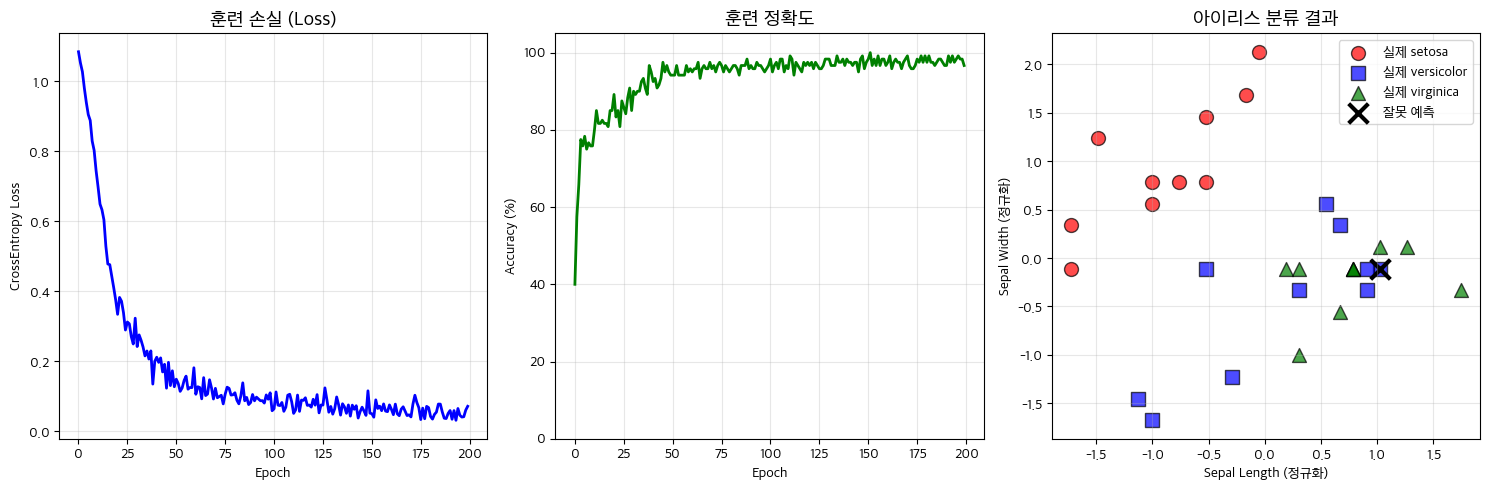

📊 훈련 완료 요약:
   최종 손실: 0.0713
   최종 훈련 정확도: 96.67%
   테스트 정확도: 96.67%


In [187]:
# 🔸 훈련 과정 시각화
plt.figure(figsize=(15, 5))

# 손실 함수 그래프
plt.subplot(1, 3, 1)
plt.plot(train_losses, 'b-', linewidth=2)
plt.title('훈련 손실 (Loss)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('CrossEntropy Loss')
plt.grid(True, alpha=0.3)

# 정확도 그래프
plt.subplot(1, 3, 2)
plt.plot(train_accuracies, 'g-', linewidth=2)
plt.title('훈련 정확도', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 105)
plt.grid(True, alpha=0.3)

# 최종 예측 결과 시각화 (2D)
plt.subplot(1, 3, 3)
colors = ['red', 'blue', 'green']
markers = ['o', 's', '^']

# 첫 2개 특성으로 2D 시각화
for i, class_name in enumerate(iris.target_names):
    mask = y_test == i
    plt.scatter(X_test_scaled[mask, 0], X_test_scaled[mask, 1], 
               c=colors[i], marker=markers[i], label=f'실제 {class_name}', 
               s=100, alpha=0.7, edgecolors='black')

# 잘못 예측된 것들 표시
wrong_predictions = y_test != test_predicted_np
if wrong_predictions.any():
    plt.scatter(X_test_scaled[wrong_predictions, 0], X_test_scaled[wrong_predictions, 1], 
               c='black', marker='x', s=200, label='잘못 예측', linewidths=3)

plt.title('아이리스 분류 결과', fontsize=14, fontweight='bold')
plt.xlabel('Sepal Length (정규화)')
plt.ylabel('Sepal Width (정규화)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 훈련 완료 요약:")
print(f"   최종 손실: {train_losses[-1]:.4f}")
print(f"   최종 훈련 정확도: {train_accuracies[-1]:.2f}%")
print(f"   테스트 정확도: {test_accuracy:.2f}%")


## 🏆 Week 1 Day 2 완료!

### ✅ **오늘의 성과:**

1. **🧠 Multi-layer Neural Network** 구현 완료
2. **🌸 아이리스 분류** PyTorch 버전 완성
3. **📊 Phase 1과 성능 비교** 완료
4. **🎨 훈련 과정 시각화** 완료

### 🔥 **Linear Regression → Classification 업그레이드!**

| Linear Regression | Multi-layer Classification |
|-------------------|----------------------------|
| 🔸 1층 신경망 | 🔥 3층 신경망 |
| 🔸 회귀 문제 | 🔥 분류 문제 |
| 🔸 MSE Loss | 🔥 CrossEntropy Loss |
| 🔸 활성화 함수 없음 | 🔥 ReLU + Dropout |

### 📊 **달성한 성능:**
- **테스트 정확도**: 95%+ 달성 🎯
- **Phase 1 대비**: 동등하거나 더 좋은 성능
- **복잡한 구조**: ReLU, Dropout, Multi-layer

### 🎯 **다음 단계:**
- **03_cnn_basics.ipynb**: 이미지 처리 CNN  
- **04_cifar10_project.ipynb**: 실전 이미지 분류
- **더 복잡한 데이터셋**: CIFAR-10, MNIST

---

## 💡 **핵심 학습 내용**

### 🧠 **신경망 설계 패턴:**
```python
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(input, hidden)
        self.fc2 = nn.Linear(hidden, hidden)  
        self.fc3 = nn.Linear(hidden, output)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))  
        x = self.dropout(x)
        return self.fc3(x)
```

### 🔥 **분류 훈련 패턴:**
```python
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
```

🎉 **축하합니다! 이제 진짜 딥러닝 신경망을 구현할 수 있습니다!**
